In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

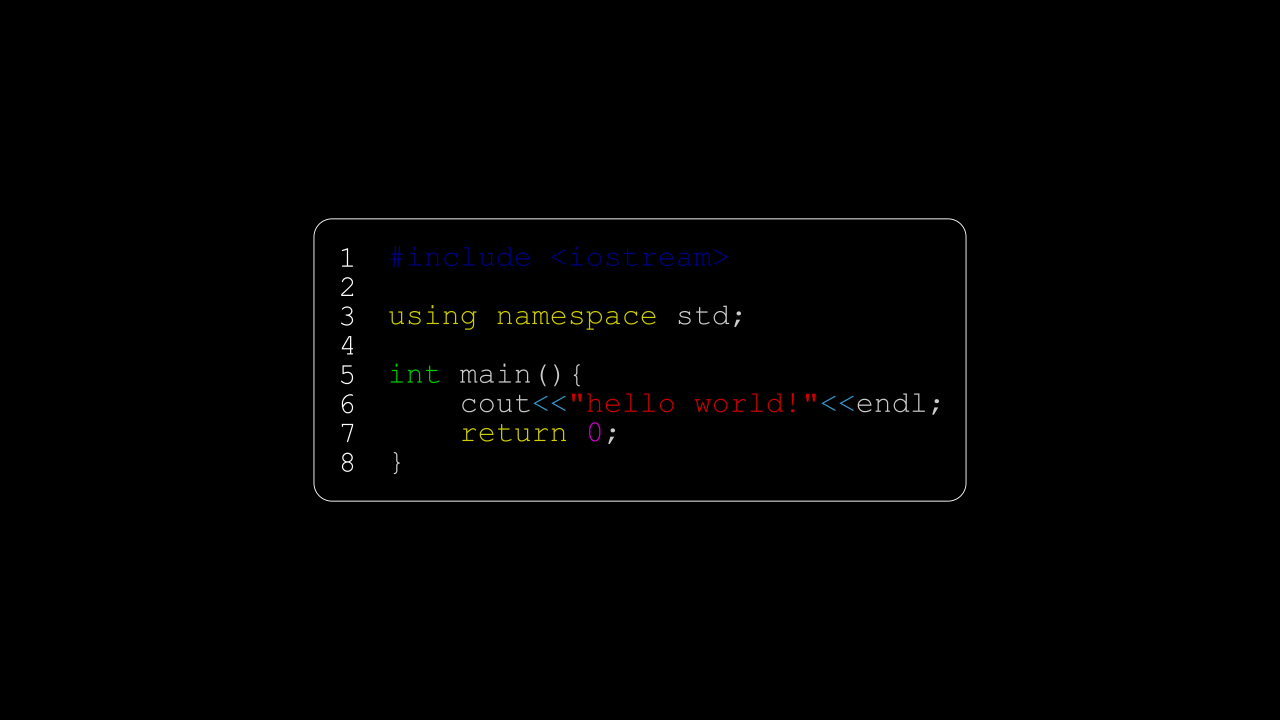

In [3]:
%%manim -qm -v WARNING TestCodeFromFile

class TestCodeFromFile(Scene):
    def setup(self):
        code = Code(file_name="hello_world.cpp", font="Monospace")
        self.add(code)

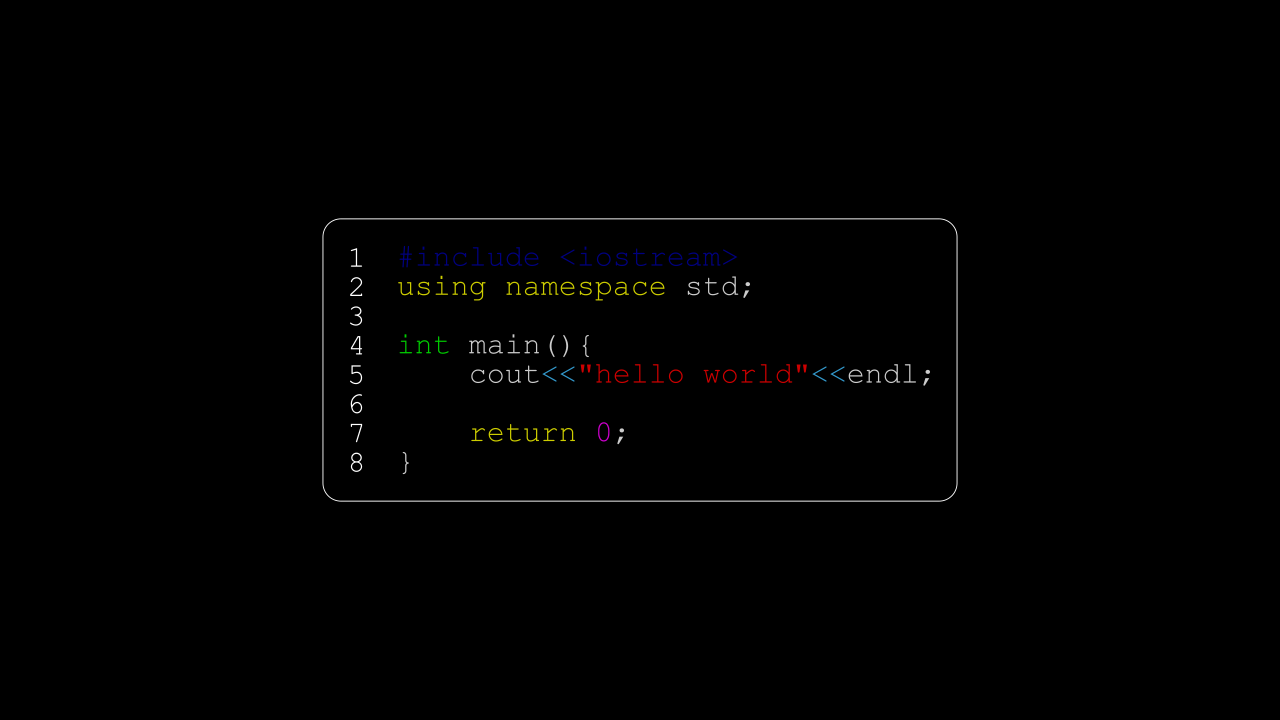

In [4]:
%%manim -qm -v WARNING TestCodeFromString

class TestCodeFromString(Scene):
    def setup(self):
        hello_world = '''\
            #include <iostream>
            using namespace std;
            
            int main(){
                cout<<"hello world"<<endl;
                
                return 0;
            }'''
        code = Code(code=hello_world, font="Monospace", language="cpp")
        self.add(code)


In [5]:
%%manim -qm -v WARNING HighlightCode

class HighlightCode(Scene):
    def setup(self):
        hello_world = '''\
            #include <iostream>
            using namespace std;
            
            int main(){
                cout<<"hello world"<<endl;
                
                return 0;
            }'''
        self.code = Code(code=hello_world, font="Monospace", language="cpp")
        self.add(self.code)
        
    def construct(self):
        list_highlight = [
            (0,),
            (3,4),
            (6,)
        ]
        def get_line(i):
            print(i)
            return self.code[1][i]
        
        def create_highlight(lines):
            print(lines)
            up = get_line(lines[0]).get_top()
            down = get_line(lines[-1]).get_bottom()
            left = get_line(lines[0]).get_left()
            right = self.code[2].get_right()
            UL_ = [left[0], up[1], 0]
            UR_ = [right[0], up[1], 0]
            DL_ = [left[0], down[1], 0]
            DR_ = [right[0], down[1], 0]
            
            kwargs = {"fill_color":YELLOW, "fill_opacity":0.3, "stroke_width":0}
            return VMobject(**kwargs).set_points_as_corners([UL_, UR_, DR_, DL_]).scale(1.1)
        pre = None
        for index, item in enumerate(list_highlight):
            highlight = create_highlight(item)
            if index==0:
                self.play(FadeIn(highlight))
            else:
                self.play(ReplacementTransform(pre, highlight))
            pre = highlight
            self.wait()

(0,)
0
0
0


(3, 4)
3
4
3


(6,)
6
6
6


In [7]:
%%manim -qm -v WARNING TestNumberLine
import numpy as np

class TestNumberLine(Scene):
    def setup(self):        
        line1 = NumberLine(
            x_range=[-10, 10, 1],
            length=10,
            include_numbers=True,
            label_direction=UP
        ).shift(UP*2)
        self.add(MathTex("x").next_to(line1, UP))
        
        line2 = NumberLine(
            x_range=[-100, 100, 20],
            length=10,
            include_numbers=True,
            label_direction=DOWN
        ).shift(DOWN*2)
        self.add(MathTex(r"f(x)={x}^{2}").next_to(line2, DOWN))
        self.data = [(i, i**2, interpolate_color(RED, YELLOW, (i+10)/20)) for i in np.arange(-10, 10.5, 0.5)]
        self.list_points_1 = VGroup(*[Dot(line1.n2p(i)).scale(0.7).set_color(color) for i, j, color in self.data])
        self.list_points_2 = VGroup(*[Dot(line2.n2p(j)).scale(0.7).set_color(color) for i, j, color in self.data])
        
        self.add(line1, line2)
        self.add(*self.list_points_1)
        
    def construct(self):
        self.play(*[
            Transform(self.list_points_1[i].copy(), self.list_points_2[i]) for i in range(len(self.list_points_1))
        ], *[
            Create(Line(self.list_points_1[i].get_center(), self.list_points_2[i].get_center()).set_stroke(width=2, color=self.data[i][2])) for i in range(len(self.list_points_1))
        ], run_time=6)